Fit with the python interface to Minuit 2 called iminuit
https://iminuit.readthedocs.io/en/stable/

In [1]:
from matplotlib import pyplot as plt
plt.rcParams["font.size"] = 20
import numpy as np

Data 

In [2]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='d')
dx =  np.array([0.1,0.1,0.5,0.1,0.5,0.1,0.5,0.1,0.5,0.1], dtype='d')
y = np.array([1.1 ,2.3 ,2.7 ,3.2 ,3.1 ,2.4 ,1.7 ,1.5 ,1.5  ,1.7 ], dtype='d')
dy = np.array([0.15,0.22,0.29,0.39,0.31,0.21,0.13,0.15,0.19,0.13], dtype='d')

Define fit function

In [3]:
def pol3(a0, a1, a2, a3):
    return a0 + x*a1 + a2*x**2 + a3*x**3

least-squares function: sum of data residuals squared

In [4]:
def LSQ(a0, a1, a2, a3):
    return np.sum((y - pol3(a0, a1, a2, a3)) ** 2 / dy ** 2)

import Minuit object

In [5]:
from iminuit import Minuit

Minuit instance using LSQ function to minimize

In [6]:
#m = Minuit(LSQ,pedantic=False)
LSQ.errordef = Minuit.LEAST_SQUARES
m = Minuit(LSQ,a0=-1.3, a1=2.6 ,a2=-0.24 ,a3=0.005, error_a0=1, error_a1=1 ,error_a2=1, error_a3=1 , print_level=1)
m.params

┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │   -1.3    │    1.0    │            │            │         │         │       │
│ 1 │ a1   │    2.6    │    1.0    │            │            │         │         │       │
│ 2 │ a2   │   -0.2    │    1.0    │            │            │         │         │       │
│ 3 │ a3   │     0     │     1     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

run migrad

In [7]:
m.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 3.719                      │        Nfcn = 107 (107 total)        │
│ EDM = 2.24e-17 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 3.719                      │        Nfcn = 107 (107 total)        │
│ EDM = 2.24e-17 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │   -0.98   │   0.34    │            │            │         │         │       │
│ 1 │ a1   │   2.52    │   0.30    │            │            │         │         │       │
│ 2 │ a2   │   -0.48   │   0.06    │            │            │         │         │       │
│ 3 │ a3   │  0.0259   │  0.0035   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

Get contour

return Minos error 1.62311e-05  , 1.62358e-05
return Minos error 1.52022e-05  , 1.51975e-05
return Minos error 1.00004  , 1.00004
return Minos error 1.00004  , 1.00004


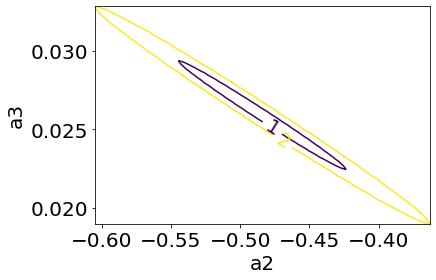

In [8]:
m.draw_mncontour("a2", "a3")

Improve the fit

In [9]:
m.hesse()

┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │   -0.98   │   0.34    │            │            │         │         │       │
│ 1 │ a1   │   2.52    │   0.30    │            │            │         │         │       │
│ 2 │ a2   │   -0.48   │   0.06    │            │            │         │         │       │
│ 3 │ a3   │  0.0259   │  0.0035   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [10]:
m.minos()

return Minos error 0.000420901  , 0.000420905


┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          a0           │          a1           │          a2           │          a3           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.34   │   0.34    │   -0.3    │    0.3    │   -0.06   │   0.06    │  -0.0035  │  0.0035   │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘

return Minos error 0.000471478  , 0.000471474
return Minos error 0.000448731  , 0.000448736
return Minos error 0.000417992  , 0.000417987


access fit results

In [11]:
print(m.values,m.errors)
a0_fit = m.values["a0"]
a1_fit = m.values["a1"]
a2_fit = m.values["a2"]
a3_fit = m.values["a3"]

<ValueView of Minuit at 34b8368>
  a0: -0.9807363852721254
  a1: 2.520457667083671
  a2: -0.4840566516384395
  a3: 0.025905852872874308 <ErrorView of Minuit at 34b8368>
  a0: 0.3448209757726395
  a1: 0.29876585731031535
  a2: 0.06045721715678036
  a3: 0.0034597918121218353


In [12]:
print (m.covariance)

{('a0', 'a0'): 0.11890150533279521, ('a0', 'a1'): -0.09589687582683493, ('a0', 'a2'): 0.018291498089858464, ('a0', 'a3'): -0.0009962584500470917, ('a1', 'a0'): -0.09589687582683493, ('a1', 'a1'): 0.0892610374943677, ('a1', 'a2'): -0.017831574464033904, ('a1', 'a3'): 0.0009947564176654832, ('a2', 'a0'): 0.018291498089858464, ('a2', 'a1'): -0.017831574464033904, ('a2', 'a2'): 0.0036550751063420973, ('a2', 'a3'): -0.00020765191692812614, ('a3', 'a0'): -0.0009962584500470917, ('a3', 'a1'): 0.0009947564176654832, ('a3', 'a2'): -0.00020765191692812614, ('a3', 'a3'): 1.1970159383225292e-05}


prepare data to display fitted function 

In [13]:
x_plot = np.linspace( 0.5, 10.5 , 500 )
y_fit = a0_fit + a1_fit * x_plot + a2_fit * x_plot**2 +  a3_fit * x_plot**3

The Minos algorithm uses the profile likelihood method to compute (generally asymmetric) confidence intervals. This can be plotted

(array([-0.60497109, -0.60252837, -0.60008565, -0.59764294, -0.59520022,
        -0.59275751, -0.59031479, -0.58787208, -0.58542936, -0.58298664,
        -0.58054393, -0.57810121, -0.5756585 , -0.57321578, -0.57077306,
        -0.56833035, -0.56588763, -0.56344492, -0.5610022 , -0.55855948,
        -0.55611677, -0.55367405, -0.55123134, -0.54878862, -0.54634591,
        -0.54390319, -0.54146047, -0.53901776, -0.53657504, -0.53413233,
        -0.53168961, -0.52924689, -0.52680418, -0.52436146, -0.52191875,
        -0.51947603, -0.51703332, -0.5145906 , -0.51214788, -0.50970517,
        -0.50726245, -0.50481974, -0.50237702, -0.4999343 , -0.49749159,
        -0.49504887, -0.49260616, -0.49016344, -0.48772073, -0.48527801,
        -0.48283529, -0.48039258, -0.47794986, -0.47550715, -0.47306443,
        -0.47062171, -0.468179  , -0.46573628, -0.46329357, -0.46085085,
        -0.45840814, -0.45596542, -0.4535227 , -0.45107999, -0.44863727,
        -0.44619456, -0.44375184, -0.44130912, -0.4

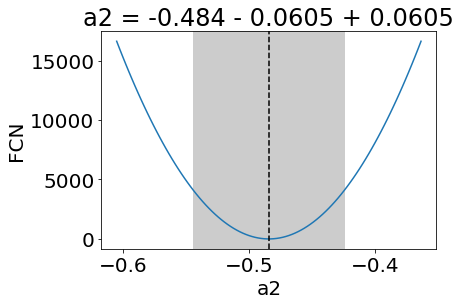

In [14]:
m.draw_profile("a2")

Get a 2D contour of the function around the minimum for 2 parameters

return Minos error 0.000448731  , 0.000448736
return Minos error 0.000417992  , 0.000417987
return Minos error 1.0012  , 1.0012
return Minos error 1.00111  , 1.00111


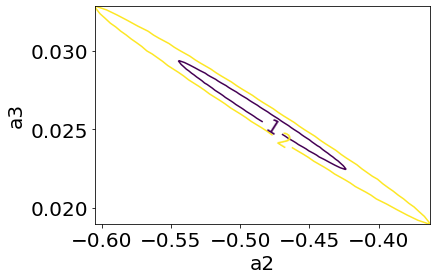

In [15]:
m.draw_mncontour("a2", "a3")

lotlib

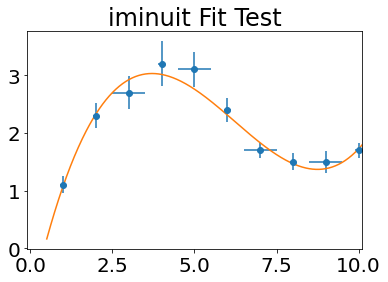

In [16]:
plt.figure()
plt.errorbar(x, y, dy , dx, fmt="o")
plt.plot(x_plot, y_fit)
plt.title("iminuit Fit Test")
plt.xlim(-0.1, 10.1)
plt.show()